## Simulation

<Axes: ylabel='time ago (generations)'>

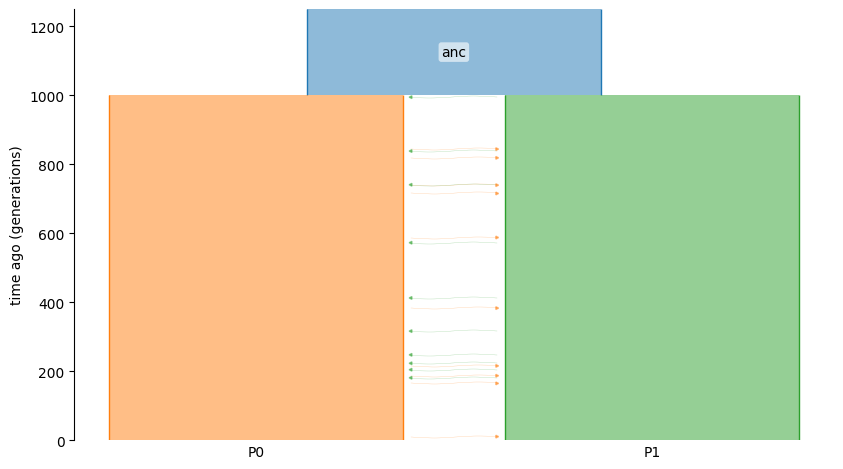

In [1]:
import msprime as msp
import demesdraw

demo = msp.Demography()
demo.add_population(initial_size=5000, name="anc")
demo.add_population(initial_size=5000, name="P0")
demo.add_population(initial_size=5000, name="P1")
demo.set_symmetric_migration_rate(populations=("P0", "P1"), rate=0.0001)
demo.add_population_split(time=1000, derived=["P0", "P1"], ancestral="anc")

g = demo.to_demes() # this demes.Graph g will be the input to demestats
demesdraw.tubes(g)

In [2]:
# simulate 10 diploids per population
sample_size = 10
samples = {"P0": sample_size, "P1": sample_size}

anc = msp.sim_ancestry(
    samples=samples,
    demography=demo,
    recombination_rate=1e-8,
    sequence_length=1e8,
    random_seed=12,
)

ts = msp.sim_mutations(anc, rate=1e-8, random_seed=13)

In [3]:
# afs_samples is based on the number of haploids
afs_samples = {"P0": sample_size * 2, "P1": sample_size * 2}
afs = ts.allele_frequency_spectrum(
    sample_sets=[ts.samples([1]), ts.samples([2])],
    span_normalise=False,
    polarised=True,
)

## Expected SFS

In [4]:
from demestats.sfs import ExpectedSFS

esfs_obj = ExpectedSFS(g, num_samples=afs_samples)
expected = esfs_obj(params={})
print(expected)

2026-01-16 15:12:22.425 | DEBUG    | demestats.traverse:traverse:151 - halted at parent={'event': Split2(donor='P0', recipient='anc'), 'block': frozenset({'P1', 'anc'}), 't': ('demes', 1, 'start_time'), 'ti': 0}
2026-01-16 15:12:22.426 | DEBUG    | demestats.traverse:traverse:151 - halted at parent={'event': Merge(), 'block': frozenset({'P1', 'P0'}), 't': ('migrations', 0, 'end_time'), 'ti': 1}
2026-01-16 15:12:22.427 | DEBUG    | demestats.traverse:traverse:151 - halted at parent={'event': Merge(), 'block': frozenset({'P1', 'P0'}), 't': ('migrations', 0, 'end_time'), 'ti': 1}
2026-01-16 15:12:22.428 | DEBUG    | demestats.traverse:traverse:151 - halted at parent={'event': Split2(donor='P0', recipient='anc'), 'block': frozenset({'P1', 'anc'}), 't': ('demes', 1, 'start_time'), 'ti': 0}
2026-01-16 15:12:23.366 | DEBUG    | demestats.traverse:traverse:151 - halted at parent={'event': Split1(donor='P1', recipient='anc'), 'block': frozenset({'anc'}), 't': ('demes', 2, 'start_time'), 'ti': 0

[[0.00000000e+00 1.51695957e+04 5.41475342e+03 2.56216528e+03
  1.35265747e+03 7.53114502e+02 4.30990875e+02 2.49922928e+02
  1.45373169e+02 8.42828522e+01 4.85051003e+01 2.74686146e+01
  1.52133350e+01 8.18399429e+00 4.24438715e+00 2.09739113e+00
  9.73139226e-01 4.14301962e-01 1.55594110e-01 4.74816486e-02
  9.59363021e-03]
 [1.51678594e+04 1.82067664e+03 1.21876074e+03 8.68300842e+02
  6.20917542e+02 4.40369171e+02 3.08587646e+02 2.13106537e+02
  1.44763412e+02 9.64981308e+01 6.29207687e+01 4.00623741e+01
  2.48038845e+01 1.48534040e+01 8.54548836e+00 4.67720032e+00
  2.40248847e+00 1.13441217e+00 4.74510849e-01 1.63256034e-01
  3.78765240e-02]
 [5.41506152e+03 1.21870471e+03 8.95181763e+02 6.93009766e+02
  5.35682800e+02 4.09253571e+02 3.08061432e+02 2.28066727e+02
  1.65756302e+02 1.18063644e+02 8.22176819e+01 5.58483696e+01
  3.68694420e+01 2.35463581e+01 1.44524803e+01 8.45552921e+00
  4.65183449e+00 2.36101079e+00 1.06755888e+00 4.01246071e-01
  1.03928879e-01]
 [2.56223730e+03

## Parameter override

In [5]:
from demestats.event_tree import EventTree

et = EventTree(g)

# Pick variables (by path) from the event tree.
v_split = et.variable_for(("demes", 0, "epochs", 0, "end_time"))
v_mig = et.variable_for(("migrations", 0, "rate"))

# All other non-selected parameters will use the values specified by model g.
# Construct new parameter setting
params = {
    v_split: 1200.0,
    v_mig: 2e-4,
}

esfs_obj = ExpectedSFS(g, num_samples={"P0": 20, "P1": 20})
expected = esfs_obj(params=params)
print(expected)

2026-01-16 15:12:31.325 | DEBUG    | demestats.traverse:traverse:151 - halted at parent={'event': Split2(donor='P0', recipient='anc'), 'block': frozenset({'P1', 'anc'}), 't': ('demes', 1, 'start_time'), 'ti': 0}
2026-01-16 15:12:31.326 | DEBUG    | demestats.traverse:traverse:151 - halted at parent={'event': Merge(), 'block': frozenset({'P1', 'P0'}), 't': ('migrations', 0, 'end_time'), 'ti': 1}
2026-01-16 15:12:31.327 | DEBUG    | demestats.traverse:traverse:151 - halted at parent={'event': Merge(), 'block': frozenset({'P1', 'P0'}), 't': ('migrations', 0, 'end_time'), 'ti': 1}
2026-01-16 15:12:31.328 | DEBUG    | demestats.traverse:traverse:151 - halted at parent={'event': Split2(donor='P0', recipient='anc'), 'block': frozenset({'P1', 'anc'}), 't': ('demes', 1, 'start_time'), 'ti': 0}
2026-01-16 15:12:31.421 | DEBUG    | demestats.traverse:traverse:151 - halted at parent={'event': Split1(donor='P1', recipient='anc'), 'block': frozenset({'anc'}), 't': ('demes', 2, 'start_time'), 'ti': 0

[[0.00000000e+00 1.60060742e+04 5.71193652e+03 2.70398657e+03
  1.43201892e+03 8.01908569e+02 4.62635498e+02 2.70693054e+02
  1.59098511e+02 9.32683487e+01 5.42792854e+01 3.10916309e+01
  1.74158955e+01 9.47578812e+00 4.96777582e+00 2.48059583e+00
  1.16134524e+00 4.97529954e-01 1.87202752e-01 5.67437001e-02
  1.10849468e-02]
 [1.52542256e+04 1.99576172e+03 1.22892139e+03 8.56449890e+02
  6.10994934e+02 4.35568848e+02 3.07869232e+02 2.14797897e+02
  1.47552765e+02 9.95088654e+01 6.56684036e+01 4.23283463e+01
  2.65331192e+01 1.60858402e+01 9.36562443e+00 5.18582392e+00
  2.69216657e+00 1.28139377e+00 5.37914872e-01 1.84077486e-01
  4.12106887e-02]
 [5.44023145e+03 1.32228857e+03 8.96091248e+02 6.77025146e+02
  5.20667969e+02 3.98774292e+02 3.01934723e+02 2.25220642e+02
  1.65129135e+02 1.18731743e+02 8.35165787e+01 5.73242607e+01
  3.82582626e+01 2.47039394e+01 1.53326559e+01 9.06692219e+00
  5.03788710e+00 2.57702947e+00 1.16975236e+00 4.37239945e-01
  1.08979098e-01]
 [2.56874072e+03

## SFS loglikelihood

In [6]:
from demestats.loglik.sfs_loglik import sfs_loglik

# multinomial loglik
mult_ll = sfs_loglik(
    afs=afs,
    esfs=expected,
)
print(mult_ll)

-430856.25


In [8]:
# poisson loglik
pois_ll = sfs_loglik(
    afs=afs,
    esfs=expected,
    sequence_length=1e8,
    theta=1e-8,
)
print(pois_ll)

630489.1


## Differentiable loglikelihood

In [ ]:
import jax
param_key = frozenset({('migrations', 0, 'rate')})
val = 0.0002

@jax.value_and_grad
def ll_at(val):
    params = {param_key: val}
    esfs = esfs_obj(params)
    return sfs_loglik(afs, esfs, 1e8, 1e-8)

loglik_value, loglik_grad = ll_at(val)
print("Log-likelihood at rate =", val, "is", loglik_value)
print("Gradient at rate =", val, "is", loglik_grad)

Log-likelihood at rate = 0.0002 is 630474.94
Gradient at rate = 0.0002 is -2051868.2


In [11]:
from demestats.constr import EventTree, constraints_for

et = EventTree(g)
variables = et.variables

cons = constraints_for(et, *variables)
A_eq, b_eq = cons["eq"]
A_ineq, b_ineq = cons["ineq"]
print(cons)

{'eq': (array([[0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.]]), array([1., 1.])), 'ineq': (array([[-1., -0., -0., -0., -0., -0., -0., -0., -0.],
       [-0., -1., -0., -0., -0., -0., -0., -0., -0.],
       [-0., -0., -1., -0., -0., -0., -0., -0., -0.],
       [-0., -0., -0., -0., -0., -1., -0., -0., -0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [-0., -0., -0., -0., -0., -0., -1., -0., -0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [-0., -0., -0., -0., -0., -0., -0., -0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.]]), array([0., 0., 0., 0., 1., 0., 1., 0., 0.]))}
